In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [69]:
df=pd.read_csv("train.csv")

In [70]:
df

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2


In [71]:
df.shape

(36752, 19)

In [72]:
null_values=df.isnull().sum()
null_values

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

In [73]:
duplicates=df.duplicated()
print(df[duplicates])

       T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  \
870   -61 -60 -56 -55 -49 -62 -72 -63 -66  -68  -64  -61  -57  -59  -64  -65   
889   -64 -70 -63 -68 -61 -57 -61 -56 -66  -70  -68  -65  -73  -65  -49  -45   
995   -67 -66 -63 -59 -61 -43 -64 -65 -82  -61  -59  -75  -57  -52  -53  -55   
1084  -67 -65 -63 -60 -62 -48 -64 -65 -80  -61  -58  -75  -57  -52  -53  -55   
1887  -65 -67 -65 -65 -60 -56 -78 -76 -78  -64  -62  -70  -57  -70  -59  -64   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
36673 -64 -57 -70 -64 -77 -69 -79 -80 -78  -55  -47  -62  -62  -80  -69  -67   
36704 -63 -71 -65 -71 -77 -68 -95 -80 -75  -63  -68  -70  -81  -95  -75  -95   
36707 -64 -72 -63 -68 -61 -57 -62 -54 -65  -70  -67  -65  -72  -65  -49  -44   
36714 -64 -67 -63 -68 -69 -64 -60 -79 -67  -75  -71  -63  -58  -51  -50  -55   
36746 -60 -61 -53 -54 -68 -60 -78 -69 -73  -69  -66  -56  -49  -67  -62  -72   

       T17  T18 target  
870    -66  -6

In [74]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 1267


In [75]:
# Remove duplicate rows
df.drop_duplicates()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2


In [76]:
df.shape

(36752, 19)

Encoding the target variable

In [77]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

In [78]:
df

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,110
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,137
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,10
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,14
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,107
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,86
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,55
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,91


Splitting the dataset into features and target variable

In [79]:
X = df.drop(columns=['target'])
y = df['target']

Splitting the dataset into training and testing sets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalizing the features

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training the RandomForestClassifier

In [82]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 Predicting the target for the test set

In [83]:
y_pred = model.predict(X_test)

Model Evaluation Evaluate the model on the test set to understand its performance.

In [84]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)


In [85]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report_result}")
print(confusion_matrix(y_test, y_test))

Accuracy: 0.9861243368249217
Classification Report:
              precision    recall  f1-score   support

          A1       0.92      0.90      0.91        39
         A10       0.88      1.00      0.93        35
         A11       1.00      1.00      1.00        41
         A12       1.00      1.00      1.00        37
         A13       1.00      1.00      1.00        41
         A14       1.00      1.00      1.00        77
         A15       1.00      0.99      0.99        86
         A16       1.00      1.00      1.00        38
         A17       0.97      0.94      0.95        31
         A18       1.00      1.00      1.00        32
         A19       1.00      1.00      1.00        40
          A2       1.00      1.00      1.00        39
         A20       1.00      1.00      1.00        45
         A21       0.93      0.99      0.96        76
         A22       1.00      1.00      1.00        38
         A23       1.00      1.00      1.00        37
         A24       1.00      

reason of applying RandomForestClassifier than other classification algorithms get best accuracy.

hyperparametr tunning

In [86]:
df_test=pd.read_csv("test.csv")

In [87]:
df_test

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


normalizing the test features

In [88]:
X_test_synthetic = scaler.transform(df_test)

predicting the target for the synthetic test set

In [89]:
y_pred_synthetic = model.predict(X_test_synthetic)

Converting numerical predictions back to original label

In [90]:
predicted_labels = label_encoder.inverse_transform(y_pred_synthetic)

In [91]:
print(f"Predicted labels for the test dataset: {predicted_labels}")

Predicted labels for the test dataset: ['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']


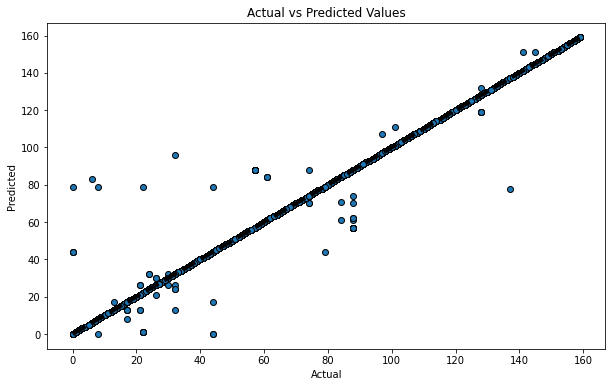

In [92]:

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()